### Metascheduler Object Types

In [1]:
# Tenant. Gets dict with virtual machines, storage requests, etc
class Tenant:
    def __init__(self, data):
        self.data = data
        self.name = data['name']
        self.g = None
        self.try_mark = None
        self.mark = None
        self.rejects = []
        
    def evaluate(self, eval_func):
        self.g = eval_func(self.data)
        
    def is_for_try(self, dc):
        result = self.try_mark is None
        result &= self.mark is None
        result &= dc not in self.rejects

        return result
    
    def __str__(self):
        return 'tenant {} for try {}'.format(self.name, self.try_mark)

In [2]:
# Datacenter. Gets dict with servers, storages, etc
class DC:
    def __init__(self, data):
        self.data = data
        self.name = data['name']
        self.d = None
        
    def evaluate(self, eval_func):
        self.d = eval_func(self.data)
        
    def __str__(self):
        return 'datacenter {}'.format(self.name)

### Data examples generation

#### Static examples

In [3]:
# the same result will be for detailed and sum stratagies
def get_example_for_equal_schedule():
    ten = {
     'links': [],
     'name': 'request1',
     'sts': [{'size': 1, 'name': 'st1', 'ports': []}],
     'vms': [{'RAM': 1024, 'VCPUs': 1, 'name': 'vm1', 'ports': []}]
    }
    t1 = Tenant(ten)

    ten = {
     'links': [],
     'name': 'request2',
     'sts': [{'size': 2, 'name': 'st1', 'ports': []}],
     'vms': [{'RAM': 2048, 'VCPUs': 2, 'name': 'vm1', 'ports': []}]
    }
    t2 = Tenant(ten)

    ten = {
     'links': [],
     'name': 'request3',
     'sts': [{'size': 4, 'name': 'st1', 'ports': []}],
     'vms': [{'RAM': 4096, 'VCPUs': 5, 'name': 'vm1', 'ports': []}]
    }
    t3 = Tenant(ten)

    tens_for_equal_schedule = [t1, t2, t3]

    res = {
     'links': [],
     'name': 'dc1',
     'netelements': [],
     'servers': [{'RAM': 32768, 'VCPUs': 5, 'name': 'computer1', 'ports': []}],
     'storages': [{'name': 'controller1', 'size': 5, 'ports': []}],
    }
    dc1 = DC(res)

    res = {
     'links': [],
     'name': 'dc2',
     'netelements': [],
     'servers': [{'RAM': 32768, 'VCPUs': 4, 'name': 'computer1', 'ports': []}],
     'storages': [{'name': 'controller1', 'size': 4, 'ports': []}],
    }
    dc2 = DC(res)

    dcs_for_equal_schedule = [dc1, dc2]
    
    return dcs_for_equal_schedule, tens_for_equal_schedule

In [4]:
# better result will be for detailed strategy
def get_example_for_detailed_schedule():
    ten = {
     'links': [],
     'name': 'request1',
     'sts': [],
     'vms': [{'RAM': 1024, 'VCPUs': 2, 'name': 'vm1', 'ports': []}]
    }
    t1 = Tenant(ten)

    ten = {
     'links': [],
     'name': 'request2',
     'sts': [],
     'vms': [{'RAM': 2048, 'VCPUs': 2, 'name': 'vm1', 'ports': []}]
    }
    t2 = Tenant(ten)

    ten = {
     'links': [],
     'name': 'request3',
     'sts': [],
     'vms': [{'RAM': 4096, 'VCPUs': 3, 'name': 'vm1', 'ports': []}]
    }
    t3 = Tenant(ten)

    tens_for_detailed_schedule = [t1, t2, t3]

    res = {
     'links': [],
     'name': 'dc1',
     'netelements': [],
     'servers': [
         {'RAM': 32768, 'VCPUs': 2, 'name': 'computer1', 'ports': []},
         {'RAM': 32768, 'VCPUs': 2, 'name': 'computer1', 'ports': []},
     ],
     'storages': []
    }
    dc1 = DC(res)

    res = {
     'links': [],
     'name': 'dc2',
     'netelements': [],
     'servers': [{'RAM': 32768, 'VCPUs': 3, 'name': 'computer1', 'ports': []}],
     'storages': []
    }
    dc2 = DC(res)

    dcs_for_detailed_schedule = [dc1, dc2]
    
    return dcs_for_detailed_schedule, tens_for_detailed_schedule

#### Examples genegation

In [5]:
import random

server_types = [
    [2, 8],
    [4, 16],
#     [4, 32],
    [6, 32],
#     [12, 32],
#     [12, 64],
#     [24, 64],
]
storage_types = [
    1,
    5,
    10,
    25,
    50,
    100,
    250,
    500,
    1000,
    2000,
]

vm_types = [
    [1, 1],
#     [1, 1],
#     [1, 1],
    [2, 2],
    [3, 2],
    [4, 8],
]

vsts_types = [
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    5,
    5,
    5,
    5,
    5,
    5,
    10,
    10,
    10,
    25,
    25,
    50,
]

def server_by_type(s_type):
    server = {
        'VCPUs': s_type[0],
        'RAM': s_type[1] * 1024,
    }
    
    return server

def get_some_servers(count, start_id = 1):
#     random.seed(1323)
    result = []
    server_id = start_id
    for i in range(count):
        ind = random.randint(0,len(server_types) - 1)
        server = server_by_type(server_types[ind])
        server['name'] = 'computer{}'.format(server_id)
        server['ports'] = []
        server_id += 1
        result.append(server)
        
    return result

def get_some_storages(count, start_id = 1):
#     random.seed(1323)
    result = []
    storage_id = start_id
    for i in range(count):
        ind = random.randint(0,len(storage_types) - 1)
        storage = {
            'name': 'storage{}'.format(storage_id),
            'ports': [],
            'size': storage_types[ind],
        }
        storage_id += 1
        result.append(storage)
    return result

def get_some_vms(count, start_id = 1):
#     random.seed(1323)
    result = []
    server_id = start_id
    for i in range(count):
        ind = random.randint(0,len(vm_types) - 1)
        server = server_by_type(vm_types[ind])
        server['name'] = 'vm{}'.format(server_id)
        server['ports'] = []
        server_id += 1
        result.append(server)
    return result

def get_some_vsts(count, start_id = 1):
#     random.seed(1323)
    result = []
    storage_id = start_id
    for i in range(count):
        ind = random.randint(0,len(vsts_types) - 1)
        storage = {
            'name': 'storage{}'.format(storage_id),
            'size': vsts_types[ind],
            'ports': [],
        }
        storage_id += 1
        result.append(storage)
        
    return result

In [6]:
def get_some_dcs(count, start_id = 1):
#     random.seed(16756)
    result = []
    for i in range(start_id, start_id + count):
        server_count = random.randint(1, 5)
        storages_count = random.randint(1, 3)
        resources = {
            'name': 'dc{}'.format(i),
            'servers': get_some_servers(server_count),
            'storages': get_some_storages(storages_count),
            'netelements': [],
            'links': [],
        }
        result.append(DC(resources))
        
    return result

def get_some_tenants(count, start_id = 1):
#     random.seed(16756)
    result = []
    for i in range(start_id, start_id + count):
        vms_count = random.randint(1, 5)
        sts_count = random.randint(1, 2)
        elems = {
            'name': 'request{}'.format(i),
            'vms': get_some_vms(vms_count),
            'sts': get_some_vsts(sts_count),
            'links': [],
        }
        result.append(Tenant(elems))
        
    return result
def get_generated_example_random(count_dcs, count_tenants):
    return (get_some_dcs(count_dcs, 1), get_some_tenants(count_tenants, 1))

### Data storing in xml

In [7]:
from bs4 import BeautifulSoup

In [8]:
def resources_to_bs(res):
    bs = BeautifulSoup('', 'xml')
    res_tag = bs.new_tag('resources')
    bs.append(res_tag)
    res_tag['migration_time'] = 100000

    for server in res['servers']:
        sr_tag = bs.new_tag('server')
        res_tag.append(sr_tag)
        sr_tag['name'] = server['name']
        sr_tag['service'] = 0
        sr_conn_tag = bs.new_tag('connection_set')
        sr_tag.append(sr_conn_tag)
        sr_conn_tag['number_of_ports'] = len(server['ports'])
        
        for port in server['ports']:
            port_tag = bs.new_tag('port')
            sr_conn_tag.append(port_tag)
            port_tag['name'] = port
            
        sr_param_tag = bs.new_tag('parameter_set')
        sr_tag.append(sr_param_tag)
        
        param_tag = bs.new_tag('parameter')
        param_tag['parameter_name'] = 'VCPUs'
        param_tag['parameter_type'] = 'integer'
        param_tag['parameter_value'] = server['VCPUs']
        sr_param_tag.append(param_tag)
        
        param_tag = bs.new_tag('parameter')
        param_tag['parameter_name'] = 'RAM'
        param_tag['parameter_type'] = 'integer'
        param_tag['parameter_value'] = server['RAM']
        sr_param_tag.append(param_tag)
        
    for st in res['storages']:
        st_tag = bs.new_tag('storage')
        res_tag.append(st_tag)
        st_tag['name'] = st['name']
        st_tag['service'] = 0
        st_conn_tag = bs.new_tag('connection_set')
        st_tag.append(st_conn_tag)
        st_conn_tag['number_of_ports'] = len(st['ports'])
        
        for port in st['ports']:
            port_tag = bs.new_tag('port')
            st_conn_tag.append(port_tag)
            port_tag['name'] = port
            
        st_param_tag = bs.new_tag('parameter_set')
        st_tag.append(st_param_tag)
        
        param_tag = bs.new_tag('parameter')
        param_tag['parameter_name'] = 'size'
        param_tag['parameter_type'] = 'real'
        param_tag['parameter_value'] = st['size']
        st_param_tag.append(param_tag)
        
    for nl in res['netelements']:
        nl_tag = bs.new_tag('netelement')
        res_tag.append(nl_tag)
        nl_tag['name'] = nl['name']
        nl_tag['is_router'] = 0
        nl_conn_tag = bs.new_tag('connection_set')
        nl_tag.append(nl_conn_tag)
        nl_conn_tag['number_of_ports'] = len(nl['ports'])
        
        for port in nl['ports']:
            port_tag = bs.new_tag('port')
            nl_conn_tag.append(port_tag)
            port_tag['name'] = port
            
        nl_param_tag = bs.new_tag('parameter_set')
        nl_tag.append(nl_param_tag)

    for link in res['links']:
        link_tag = bs.new_tag('link')
        res_tag.append(link_tag)
        link_tag['channel_capacity'] = link['cap']
        link_tag['node1'] = link['fst_node']
        link_tag['node2'] = link['snd_node']
        link_tag['port1'] = link['fst_port']
        link_tag['port2'] = link['snd_port']
        link_tag['service'] = 0
        
    return bs.resources

In [9]:
def tenant_to_bs(ten):
    bs = BeautifulSoup('', 'xml')
    tenant_tag = bs.new_tag('tenant')
    tenant_tag['name'] = ten['name']
    
    ln = bs.new_tag('list_of_nodes')
    ll = bs.new_tag('list_of_links')
    tenant_tag.append(ln)
    tenant_tag.append(ll)
    
    for link in ten['links']:
        link_tag = bs.new_tag('link')
        ll.append(link_tag)
        link_tag['channel_capacity'] = link['cap']
        link_tag['node1'] = link['fst_node']
        link_tag['node2'] = link['snd_node']
        link_tag['port1'] = link['fst_port']
        link_tag['port2'] = link['snd_port']
        link_tag['service'] = 0
        
    
    for vm in ten['vms']:
        vm_tag = bs.new_tag('vm')
        ln.append(vm_tag)
        vm_tag['name'] = vm['name']
        if 'a_to' in vm:
            vm_tag['assignedTo'] = vm['a_to']
        vm_conn_tag = bs.new_tag('connection_set')
        vm_tag.append(vm_conn_tag)
        vm_conn_tag['number_of_ports'] = len(vm['ports'])
        
        for port in vm['ports']:
            port_tag = bs.new_tag('port')
            vm_conn_tag.append(port_tag)
            port_tag['name'] = port
            
        vm_param_tag = bs.new_tag('parameter_set')
        vm_tag.append(vm_param_tag)
        
        param_tag = bs.new_tag('parameter')
        param_tag['parameter_name'] = 'VCPUs'
        param_tag['parameter_type'] = 'integer'
        param_tag['parameter_value'] = vm['VCPUs']
        vm_param_tag.append(param_tag)
        
        param_tag = bs.new_tag('parameter')
        param_tag['parameter_name'] = 'RAM'
        param_tag['parameter_type'] = 'integer'
        param_tag['parameter_value'] = vm['RAM']
        vm_param_tag.append(param_tag)
        
    for st in ten['sts']:
        st_tag = bs.new_tag('st')
        ln.append(st_tag)
        st_tag['name'] = st['name']
        st_conn_tag = bs.new_tag('connection_set')
        st_tag.append(st_conn_tag)
        st_conn_tag['number_of_ports'] = len(st['ports'])
        
        for port in st['ports']:
            port_tag = bs.new_tag('port')
            st_conn_tag.append(port_tag)
            port_tag['name'] = port
            
        st_param_tag = bs.new_tag('parameter_set')
        st_tag.append(st_param_tag)
        
        param_tag = bs.new_tag('parameter')
        param_tag['parameter_name'] = 'size'
        param_tag['parameter_type'] = 'real'
        param_tag['parameter_value'] = st['size']
        st_param_tag.append(param_tag)
    
    
    bs.append(tenant_tag)
    
    return bs.tenant

In [10]:
def create_xml(filename, res, tens):
    bs = BeautifulSoup('', 'xml')
    dcxml_tag = bs.new_tag('dcxml')
    bs.append(dcxml_tag)
    dcxml_tag['name'] = ''
    res_tag = resources_to_bs(res)
    dcxml_tag.append(res_tag)
    tens_tag = bs.new_tag('tenants')
    dcxml_tag.append(tens_tag)
    
    for ten in tens:
        ten_tag = tenant_to_bs(ten)
        tens_tag.append(ten_tag)
    
#     print(bs.prettify())
    with open(filename, 'w') as f:
        f.write(str(bs.prettify()))

### Local Algo calling

In [11]:
from subprocess import call, check_output
fn_input_t = 'for_scheduling/input/{}.dcxml'
fn_output_t = 'for_scheduling/output/{}.dcxml'

def call_scheduler(fn_input, fn_output):
    call_data = [
        'diploma/old_algo/algo/algo',
        fn_input,
        fn_output,
        'out.huawei',
    ]
    call(call_data)

In [12]:
def check_schedule(filename):
    scheduled = []
    not_scheduled = []
    assigned_vms = dict()
    assigned_sts = dict()
    with open(filename, 'r') as f:
        data = f.read()
    bs = BeautifulSoup(data, 'xml')
    for tenant_tag in bs.find_all('tenant'):
        tenant_name = tenant_tag['name']
        tenant_scheduled = True
        for vm_tag in tenant_tag.find_all('vm'):
            if not vm_tag.has_attr('assignedTo'):
                tenant_scheduled = False
            elif vm_tag['assignedTo'] == '':
                tenant_scheduled = False
            else:
                sign = vm_tag['assignedTo']
                sign_val = (tenant_tag['name'], vm_tag['name'])
                if sign not in assigned_vms:
                    assigned_vms[sign] = [sign_val]
                else:
                    assigned_vms[sign].append(sign_val)
        for st_tag in tenant_tag.find_all('st'):
            if not st_tag.has_attr('assignedTo'):
                tenant_scheduled = False
            elif st_tag['assignedTo'] == '':
                tenant_scheduled = False
            else:
                sign = st_tag['assignedTo']
                sign_val = (tenant_tag['name'], st_tag['name'])
                if sign not in assigned_sts:
                    assigned_sts[sign] = [sign_val]
                else:
                    assigned_sts[sign].append(sign_val)
        if tenant_scheduled:
            scheduled.append(tenant_name)
        else:
            not_scheduled.append(tenant_name)
            
    return {'scheduled': scheduled, 'not_scheduled': not_scheduled, 'vms': assigned_vms, 'sts': assigned_sts}

### Evaluators

In [13]:
from functools import reduce
class Evaluator_base:
    def __init__(self):
        pass
    def get_eval_dc(self, dc_data):
        pass
    def get_eval_tenant(self, tenant_data):
        pass
    def get_sort_eval_dc(self, eval_dc):
        pass
    def get_sort_eval_tenant(self, eval_tenant):
        pass
    def decrease_eval_dc(self, eval_dc, eval_tenant):
        pass
    def test_dec_possible(self, eval_dc, eval_tenant):
        pass

    def get_vm_params(self, ten_name, vm_name, tens_data):
        for ten in tens_data:
            if ten['name'] == ten_name:
                for vm in ten['vms']:
                    if vm['name'] == vm_name:
                        return vm
        return None

    def get_st_params(self, ten_name, st_name, tens_data):
        for ten in tens_data:
            if ten['name'] == ten_name:
                for st in ten['sts']:
                    if st['name'] == st_name:
                        return st
        return None

    def dec_res_by_assigned(self, assigned, dc_data, tens_data):
        for server in dc_data['servers']:
            s_name = server['name']
            if s_name in assigned['vms']:
                for vm in assigned['vms'][s_name]:
                    ten_name, vm_name = vm
                    vm_params = self.get_vm_params(ten_name, vm_name, tens_data)
                    server['VCPUs'] -= vm_params['VCPUs']
                    server['RAM'] -= vm_params['RAM']
        for storage in dc_data['storages']:
            s_name = storage['name']
            if s_name in assigned['sts']:
                for st in assigned['sts'][s_name]:
                    ten_name, st_name = st
                    st_params = self.get_st_params(ten_name, st_name, tens_data)
                    storage['size'] -= st_params['size']
        return None

In [14]:
class Evaluator_summed(Evaluator_base):
    def __init__(self):
        Evaluator_base.__init__(self)
        
    def get_eval_dc(self, dc_data):
        servers = reduce(
                    lambda x, y: {'RAM': x['RAM'] + y['RAM'], 'VCPUs': x['VCPUs'] + y['VCPUs']},
                    dc_data['servers']
                 )
        sts = reduce(
                    lambda x, y: x + y['size'],
                    dc_data['storages'],
                    0
                 )
        servers['st_size'] = sts
        
        return servers
    
    def get_eval_tenant(self, tenant_data):
        vms = reduce(
                    lambda x, y: {'RAM': x['RAM'] + y['RAM'], 'VCPUs': x['VCPUs'] + y['VCPUs']},
                    tenant_data['vms']
                 )
        sts = reduce(
                    lambda x, y: x + y['size'],
                    tenant_data['sts'],
                    0
                 )
        vms['st_size'] = sts
        
        return vms
    
    def get_sort_eval_dc(self, eval_dc):
        return (eval_dc['VCPUs'], eval_dc['RAM'], eval_dc['st_size'])
    
    def get_sort_eval_tenant(self, eval_tenant):
        return (eval_tenant['VCPUs'], eval_tenant['RAM'], eval_tenant['st_size'])
    
    def decrease_eval_dc(self, eval_dc, eval_tenant):
        result = {
            'VCPUs': eval_dc['VCPUs'] - eval_tenant['VCPUs'],
            'RAM': eval_dc['RAM'] - eval_tenant['RAM'],
            'st_size': eval_dc['st_size'] - eval_tenant['st_size'],
        }
        
        return result
    
    def test_dec_possible(self, eval_dc, eval_tenant):
        dec_version = self.decrease_eval_dc(eval_dc, eval_tenant)
        for _, v in dec_version.items():
            if v < 0:
                return False
            
        return True

In [15]:
class Evaluator_details(Evaluator_base):
    def __init__(self):
        Evaluator_base.__init__(self)
        
    def get_eval_dc(self, dc_data):
        return dc_data
    
    def get_eval_tenant(self, tenant_data):
        return tenant_data
    
    def get_sort_eval_dc(self, eval_dc):
        vcpus = reduce(
                    lambda x, y: x + y['VCPUs'],
                    eval_dc['servers'],
                    0
              )
        rams = reduce(
                    lambda x, y: x + y['RAM'],
                    eval_dc['servers'],
                    0
              )
        sts = reduce(
                    lambda x, y: x + y['size'],
                    eval_dc['storages'],
                    0
              )
        
        return (vcpus, rams, sts)
    
    def get_sort_eval_tenant(self, eval_tenant):
        vcpus = reduce(
                    lambda x, y: x + y['VCPUs'],
                    eval_tenant['vms'],
                    0
              )
        rams = reduce(
                    lambda x, y: x + y['RAM'],
                    eval_tenant['vms'],
                    0
              )
        sts = reduce(
                    lambda x, y: x + y['size'],
                    eval_tenant['sts'],
                    0
              )
        
        return (vcpus, rams, sts)
    
    def decrease_eval_dc(self, eval_dc, eval_tenant):
        eval_dc_copy = eval_dc.copy()
        eval_dc_copy['servers'] = [x.copy() for x in eval_dc_copy['servers']]
        eval_dc_copy['storages'] = [x.copy() for x in eval_dc_copy['storages']]
        eval_dc = eval_dc_copy
        
        for vm in eval_tenant['vms']:
            possible_for_vm = []
            for server in eval_dc['servers']:
                if vm['VCPUs'] <= server['VCPUs'] and vm['RAM'] <= server['RAM']:
                    possible_for_vm.append(server)
            if len(possible_for_vm) > 0:
                server_chosen = min(possible_for_vm, key=lambda x: (x['VCPUs'], x['RAM']))
                server_chosen['VCPUs'] -= vm['VCPUs']
                server_chosen['RAM'] -= vm['RAM']
            else:
                eval_dc['overload'] = True
        for st in eval_tenant['sts']:
            possible_for_st = []
            for storage in eval_dc['storages']:
                if st['size'] <= storage['size']:
                    possible_for_st.append(storage)
            if len(possible_for_st) > 0:
                storage_chosen = min(possible_for_st, key=lambda x: x['size'])
                storage_chosen['size'] -= st['size']
            else:
                eval_dc['overload'] = True

        return eval_dc
    
    def test_dec_possible(self, eval_dc, eval_tenant):
        dec_version = self.decrease_eval_dc(eval_dc, eval_tenant)
        if 'overload' in dec_version:
            if dec_version['overload'] == True:
                return False
        for server in dec_version['servers']:
            if server['VCPUs'] < 0:
                return False
            if server['RAM'] < 0:
                return False
        for storage in dec_version['storages']:
            if storage['size'] < 0:
                return False
        
        return True

### Main Algorithm

In [104]:
def main_algo(iter_max, dcs, tens, e, dc_choice = 'max', ten_choice = 'max', verbose_lvl = 0):
#     if 'random' in [dc_choice, ten_choice]:
#         random.seed(2332)
    dc_names = [x.name for x in dcs]
    iter_count = 0
    are_tenants_for_schedule = True
    while (iter_count < iter_max) and are_tenants_for_schedule:
        for dc in dcs:
            dc.d = e.get_eval_dc(dc.data)
        for ten in tens:
            ten.g = e.get_eval_tenant(ten.data)
        
        
        run_loader = True
        decreasing_dcs = dcs.copy()
        while run_loader:
            if dc_choice == 'max':
                dc = max(decreasing_dcs, key=lambda x: e.get_sort_eval_dc(x.d))
            elif dc_choice == 'random':
                dc = random.choice(decreasing_dcs)
            else:
                raise Exception('unknown dc choice strategy {}'.format(dc_choice))
                
            if verbose_lvl > 0:
                print('max dc: {} with {}'.format(dc, e.get_sort_eval_dc(dc.d)))
            for_try = [x for x in tens if x.is_for_try(dc) and e.test_dec_possible(dc.d, x.g)]
            if len(for_try) > 0:
                if ten_choice == 'max':
                    tenant = max(for_try, key=lambda x: e.get_sort_eval_tenant(x.g))
                elif ten_choice == 'random':
                    tenant = random.choice(for_try)
                else:
                    raise Exception('unknown tenant choice strategy {}'.format(ten_choice))
                    
                if verbose_lvl > 0:
                    print('Tenant {} {} to try for this max dc'.format(tenant.name, e.get_sort_eval_tenant(tenant.g)))
                tenant.try_mark = dc
                dc.d = e.decrease_eval_dc(dc.d, tenant.g)
            else:
                decreasing_dcs.remove(dc)
                
            if len(decreasing_dcs) == 0:
                run_loader = False
                
        are_tenants_for_schedule = False
        dc_requests = {dc_name : [] for dc_name in dc_names}
        for tenant in tens:
            if verbose_lvl > 1:
                print(tenant)
            if tenant.try_mark is not None:
                dc_requests[tenant.try_mark.name].append(tenant.data)
                are_tenants_for_schedule = True
        if are_tenants_for_schedule:
            tensdata = [x.data for x in tens]
            for dc in dcs:
                if verbose_lvl > 1:
                    print('Sending to {} with {}'.format(dc, e.get_sort_eval_dc(dc.d)))
                filename_in = fn_input_t.format(dc.name)
                filename_out = fn_output_t.format(dc.name)
                create_xml(filename_in, dc.data, dc_requests[dc.name])
                call_scheduler(filename_in, filename_out)
                assigned = check_schedule(filename_out)
                if verbose_lvl > 2:
                    print(assigned)

                e.dec_res_by_assigned(assigned, dc.data, tensdata)
                if verbose_lvl > 1:
                    print('now {} with {}'.format(dc, e.get_sort_eval_dc(dc.d)))

                for ten_name in assigned['scheduled']:
                    ten_by_name = [x for x in tens if x.name == ten_name][0]
                    ten_by_name.mark = ten_by_name.try_mark
                    ten_by_name.try_mark = None
                for ten_name in assigned['not_scheduled']:
                    ten_by_name = [x for x in tens if x.name == ten_name][0]
                    ten_by_name.rejects.append(ten_by_name.try_mark)
                    ten_by_name.try_mark = None

            iter_count += 1
        if verbose_lvl > 0:
            print('-----')
    if verbose_lvl > 0:
        res_str = 'Iterations done: {}'.format(iter_count)
        print(res_str)
    if verbose_lvl > 1:
        for ten in tens:
            print('{} scheduled on {}'.format(ten.name, ten.mark))

    tens_assigned = [x for x in tens if x.mark is not None]
    vcpu_count = 0
    for ten in tens_assigned:
        vcpu_count += sum([x['VCPUs'] for x in ten.data['vms']])
    
    return len(tens_assigned), iter_count, vcpu_count
#     return reduce(lambda x, y: x + int(y.mark is not None), tens, 0), iter_count


### Experiments

#### Equal results

In [105]:
e = Evaluator_details()
dcs, tens = get_example_for_equal_schedule()
main_algo(3, dcs, tens, e)

(3, 1, 8)

In [106]:
e = Evaluator_summed()
dcs, tens = get_example_for_equal_schedule()
main_algo(3, dcs, tens, e)

(3, 1, 8)

#### Results differ

In [107]:
e = Evaluator_details()
dcs, tens = get_example_for_detailed_schedule()
main_algo(3, dcs, tens, e)

(3, 1, 7)

In [108]:
e = Evaluator_summed()
dcs, tens = get_example_for_detailed_schedule()
main_algo(3, dcs, tens, e)

(2, 2, 4)

#### Results for generated data

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

In [122]:
def test_run(e, dc_strat, ten_strat, count_experiments=100):
    reqs = np.empty(count_experiments)
    iters = np.empty(count_experiments)
    cpus = np.empty(count_experiments)
    for i in range(count_experiments):
        dcs, tens = get_generated_example_random(3, 30)
        reqs[i], iters[i], cpus[i] = main_algo(10, dcs, tens, e, dc_strat, ten_strat, verbose_lvl=0)
        
    return reqs, iters, cpus
        

In [ ]:
e_det = Evaluator_details()
e_sum = Evaluator_summed()

In [128]:
print('Граф остаточных ресурсов')
for dc_strat in ['random', 'max']:
    for ten_strat in ['random', 'max']:
        reqs, iters, cpus = test_run(e_det, dc_strat, ten_strat, 100)
        txt = 'стратегия выбора ЦОД :{}, стратегия выбора запроса: {}, запросов {}, ядер {}, итераций {}'.format(
            dc_strat,
            ten_strat,
            reqs.sum(),
            cpus.sum(),
            iters.sum()
        )
        print(txt)

Граф остаточных ресурсов
стратегия выбора ЦОД :random, стратегия выбора запроса: random, запросов 766.0, ядер 3426.0, итераций 102.0
стратегия выбора ЦОД :random, стратегия выбора запроса: max, запросов 488.0, ядер 3326.0, итераций 101.0
стратегия выбора ЦОД :max, стратегия выбора запроса: random, запросов 753.0, ядер 3241.0, итераций 107.0
стратегия выбора ЦОД :max, стратегия выбора запроса: max, запросов 478.0, ядер 3323.0, итераций 104.0


In [129]:
print('Суммарные ресурсы ЦОД')
for dc_strat in ['random', 'max']:
    for ten_strat in ['random', 'max']:
        reqs, iters, cpus = test_run(e_sum, dc_strat, ten_strat, 100)
        txt = 'стратегия выбора ЦОД :{}, стратегия выбора запроса: {}, запросов {}, ядер {}, итераций {}'.format(
            dc_strat,
            ten_strat,
            reqs.sum(),
            cpus.sum(),
            iters.sum()
        )
        print(txt)

Суммарные ресурсы ЦОД
стратегия выбора ЦОД :random, стратегия выбора запроса: random, запросов 732.0, ядер 3234.0, итераций 160.0
стратегия выбора ЦОД :random, стратегия выбора запроса: max, запросов 477.0, ядер 3369.0, итераций 311.0
стратегия выбора ЦОД :max, стратегия выбора запроса: random, запросов 763.0, ядер 3336.0, итераций 159.0
стратегия выбора ЦОД :max, стратегия выбора запроса: max, запросов 470.0, ядер 3455.0, итераций 274.0


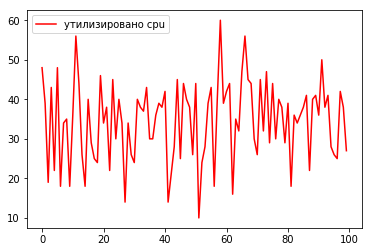

In [132]:
plt.plot(cpus, color='red', label='утилизировано cpu')
plt.legend()